### Prediction Customer Churn 

Using a decision tree algorithm, predict customer churn using a longdstanding telecom customer data set.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline


In [144]:
churn_df = pd.read_csv('churn.csv')

# Columns
col_names = churn_df.columns
print("Column names:\n", col_names.to_list())

Column names:
 ['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [145]:
# First 10 rows of data
churn_df.head(10)

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   
5    AL             118        510  391-8027        yes         no   
6    MA             121        510  355-9993         no        yes   
7    MO             147        415  329-9001        yes         no   
8    LA             117        408  335-4719         no         no   
9    WV             141        415  330-8173        yes        yes   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   
5              0     223.4         98       37.98  ...        101       18.75   
6             24     218.2         88       37.09  ...        108       29.62   
7              0     157.0         79       26.69  ...         94        8.76   
8              0     184.5         97       31.37  ...         80       29.89   
9             37     258.6         84       43.96  ...        111       18.87   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   
5       203.9          118          9.18        6.3           6         1.70   
6       212.6          118          9.57        7.5           7         2.03   
7       211.8           96          9.53        7.1           6         1.92   
8       215.8           90          9.71        8.7           4         2.35   
9       326.4           97         14.69       11.2           5         3.02   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  
5               0  False.  
6               3  False.  
7               0  False.  
8               1  False.  
9               0  False.  

[10 rows x 21 columns]

In [146]:
# Capture the labels and change them to 1 or 0 class
labels = churn_df['Churn?'].replace(['True.','False.'], [1, 0])

# Convert all yes or no values to Boolean True or False
churn_df[["Int'l Plan", "VMail Plan"]] = churn_df[["Int'l Plan", "VMail Plan"]] == 'yes'

# Drop irrelevant columns
samples_df = churn_df.drop(['State','Area Code','Phone','Churn?'], axis=1)

# Assign features
features = samples_df.columns


In [147]:
# Create a numpy matrix to hold the samples
samples = samples_df.to_numpy(dtype=np.float)
samples

array([[128.  ,   0.  ,   1.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  ,   0.  ,   1.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  ,   0.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 28.  ,   0.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
       [184.  ,   1.  ,   0.  , ...,  10.  ,   1.35,   2.  ],
       [ 74.  ,   0.  ,   1.  , ...,   4.  ,   3.7 ,   0.  ]])

In [148]:
# Normalize each feature to a range of 1 to -1 
scaler = StandardScaler()
samples_norm = scaler.fit_transform(samples)

print("Feature space holds %d observations and %d features" % samples_norm.shape)
print("Unique target labels:", np.unique(labels))

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


In [149]:
def run_cv(X, y, clf_type, k, **kwargs):
    
    '''
    Define a function to iteratively run cross-validation through the K folds and 
    return the predicted labels.
    '''
    
    # Create the KFold object
    kf = KFold(n_splits=k, shuffle=True)
    y_pred = y.copy()
        
    # For each fold, create a classifier to fit on the train split and predict on the test split
    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf = clf_type(**kwargs)
        clf.fit(X_train, y_train)
        y_pred[test_index] = clf.predict(X_test)
    
    return y_pred

When running the Decision Tree vs Random Forest classifiers, we see that the Random Forest greatly improves on the Decision Tree performance.

In [150]:
# Number of folds to be used in cross-validation
k = 5

# Output the classification reports for the decision tree and ensemble random forest respectively

DT_preds = run_cv(samples_norm, labels, DecisionTreeClassifier, k)
print("Decision Tree metrics:")
print(classification_report(labels, DT_preds), '\n')

RF_preds = run_cv(samples_norm, labels, RandomForestClassifier, k)
print("Random Forest metrics:")
print(classification_report(labels, RF_preds))


Decision Tree metrics:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2850
           1       0.69      0.72      0.70       483

    accuracy                           0.91      3333
   macro avg       0.82      0.83      0.83      3333
weighted avg       0.91      0.91      0.91      3333
 

Random Forest metrics:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.93      0.73      0.82       483

    accuracy                           0.95      3333
   macro avg       0.94      0.86      0.90      3333
weighted avg       0.95      0.95      0.95      3333



Also test Naive Bayes and KNN.

In [160]:
# Output the classification reports for KNN and Naive Bayes respectively

KNN_preds = run_cv(samples_norm, labels, KNeighborsClassifier, k)
print("K-Nearest Neighbors metrics:")
print(classification_report(labels, KNN_preds), '\n')


NB_preds = run_cv(samples_norm, labels, GaussianNB, k)
print("Gaussian Naive Bayes metrics:")
print(classification_report(labels, NB_preds))

K-Nearest Neighbors metrics:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2850
           1       0.81      0.35      0.49       483

    accuracy                           0.89      3333
   macro avg       0.86      0.67      0.72      3333
weighted avg       0.89      0.89      0.88      3333
 

Gaussian Naive Bayes metrics:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2850
           1       0.54      0.53      0.53       483

    accuracy                           0.87      3333
   macro avg       0.73      0.73      0.73      3333
weighted avg       0.86      0.87      0.87      3333



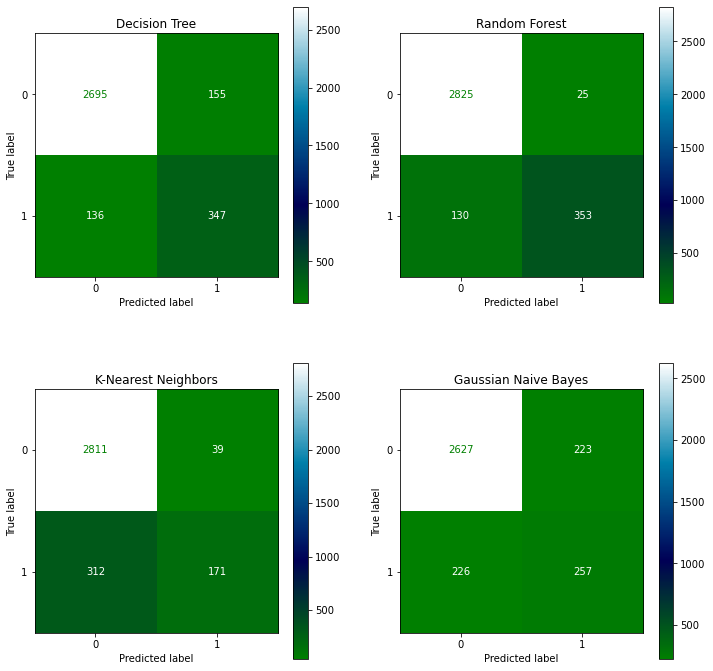

In [162]:
# Plot the confusion matrix for each classifier

fig, ax = plt.subplots(2,2, figsize=(12,12))

DT_disp = ConfusionMatrixDisplay(confusion_matrix(labels, DT_preds))
DT_disp.plot(ax=ax[0][0], cmap='ocean')
ax[0][0].set_title('Decision Tree')

RF_disp = ConfusionMatrixDisplay(confusion_matrix(labels, RF_preds))
RF_disp.plot(ax=ax[0][1], cmap='ocean')
ax[0][1].set_title('Random Forest')

KNN_disp = ConfusionMatrixDisplay(confusion_matrix(labels, KNN_preds))
KNN_disp.plot(ax=ax[1][0], cmap='ocean')
ax[1][0].set_title('K-Nearest Neighbors')

NB_disp = ConfusionMatrixDisplay(confusion_matrix(labels, NB_preds))
NB_disp.plot(ax=ax[1][1], cmap='ocean')
ax[1][1].set_title('Gaussian Naive Bayes')

plt.show()